In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [75]:
cpg_features = pd.read_excel('/Users/evgeniahohlova/Documents/RF_episign/features_for_RF.xlsx')

In [76]:
cpg_features

,Patient_ID,Disease_state,cg23269692,cg24168308,cg05835726,cg14853974,cg25556579,cg07278425,cg21090457,cg19719409,...,cg20002504,cg01529207,cg21097881,cg08597025,cg04972745,cg20667480,cg10218876,cg04850017,cg23667734,cg11965913
0,CHARGE.Sample_139,CHARGE,1.287443,1.104185,3.758655,1.287796,-1.301101,-1.243856,-0.899014,1.261864,...,-5.332757,3.314569,-5.086075,-0.004430,-2.705422,-4.410675,-2.207608,2.485770,-5.183848,-0.532242
1,CHARGE.Sample_82,CHARGE,1.800830,1.724436,3.701935,1.171078,-0.872651,-0.646045,0.265677,1.595800,...,-1.879723,0.378146,-5.131194,0.448562,-2.160280,-3.569708,-3.884717,3.000271,-5.357382,-0.638178
2,CHARGE.Sample_189,CHARGE,1.877519,1.350891,3.357038,1.278131,-0.787170,-0.355672,-0.676717,1.214164,...,-3.104772,3.065694,-0.855780,-2.924399,-3.229852,-4.855842,-0.120797,-0.307626,-4.670813,-3.154672
3,CHARGE.Sample_164,CHARGE,1.477454,1.490971,3.589336,1.102939,-0.543497,-0.167984,-0.388815,1.817891,...,-3.381126,2.761248,-4.325823,0.345735,-1.915978,-2.852186,-2.919991,2.604423,-4.738446,-3.408148
4,CHARGE.Sample_35,CHARGE,1.501428,1.223694,2.501181,0.963676,-1.255045,0.158549,-0.465919,1.405612,...,-4.305134,2.675602,-5.483135,-0.067531,-3.918679,-4.977844,-0.960408,2.240922,-4.824609,0.054639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,KMT2D variant.Sample_21,KMT2D,0.403995,0.475936,3.741547,0.580219,-0.351916,0.730079,2.206704,2.472428,...,-3.437474,2.796508,-1.974884,-1.588714,-1.793944,-5.056685,-4.804226,0.817505,-4.346826,-0.546108
83,KMT2D variant.Sample_138,KMT2D,1.303941,0.919136,3.120403,0.135614,-0.428761,0.197117,0.790763,1.826995,...,-4.998020,0.399320,-5.506474,0.685940,-2.972133,-4.530856,-2.866205,0.766199,-12.705256,-4.750189
84,KMT2D variant.Sample_181,KMT2D,0.257563,0.195690,1.920918,0.240770,-0.331720,0.751496,0.440857,2.403199,...,-4.034110,0.229633,-5.408502,0.361888,-1.587881,-4.853196,-0.978812,3.057887,-5.959939,-5.390031
85,KMT2D variant.Sample_61,KMT2D,0.822163,0.701505,2.879332,0.735081,-0.387436,1.511895,1.772481,2.513686,...,-5.017035,3.053100,-1.973866,-0.041118,-1.693964,-4.388366,-4.620786,1.641038,-13.729719,-4.474893


In [77]:
features = cpg_features.drop(columns=["Patient_ID"])
features

,Disease_state,cg23269692,cg24168308,cg05835726,cg14853974,cg25556579,cg07278425,cg21090457,cg19719409,cg11758841,...,cg20002504,cg01529207,cg21097881,cg08597025,cg04972745,cg20667480,cg10218876,cg04850017,cg23667734,cg11965913
0,CHARGE,1.287443,1.104185,3.758655,1.287796,-1.301101,-1.243856,-0.899014,1.261864,0.767043,...,-5.332757,3.314569,-5.086075,-0.004430,-2.705422,-4.410675,-2.207608,2.485770,-5.183848,-0.532242
1,CHARGE,1.800830,1.724436,3.701935,1.171078,-0.872651,-0.646045,0.265677,1.595800,1.533820,...,-1.879723,0.378146,-5.131194,0.448562,-2.160280,-3.569708,-3.884717,3.000271,-5.357382,-0.638178
2,CHARGE,1.877519,1.350891,3.357038,1.278131,-0.787170,-0.355672,-0.676717,1.214164,0.391694,...,-3.104772,3.065694,-0.855780,-2.924399,-3.229852,-4.855842,-0.120797,-0.307626,-4.670813,-3.154672
3,CHARGE,1.477454,1.490971,3.589336,1.102939,-0.543497,-0.167984,-0.388815,1.817891,0.797059,...,-3.381126,2.761248,-4.325823,0.345735,-1.915978,-2.852186,-2.919991,2.604423,-4.738446,-3.408148
4,CHARGE,1.501428,1.223694,2.501181,0.963676,-1.255045,0.158549,-0.465919,1.405612,0.426650,...,-4.305134,2.675602,-5.483135,-0.067531,-3.918679,-4.977844,-0.960408,2.240922,-4.824609,0.054639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,KMT2D,0.403995,0.475936,3.741547,0.580219,-0.351916,0.730079,2.206704,2.472428,1.032461,...,-3.437474,2.796508,-1.974884,-1.588714,-1.793944,-5.056685,-4.804226,0.817505,-4.346826,-0.546108
83,KMT2D,1.303941,0.919136,3.120403,0.135614,-0.428761,0.197117,0.790763,1.826995,1.812701,...,-4.998020,0.399320,-5.506474,0.685940,-2.972133,-4.530856,-2.866205,0.766199,-12.705256,-4.750189
84,KMT2D,0.257563,0.195690,1.920918,0.240770,-0.331720,0.751496,0.440857,2.403199,1.491691,...,-4.034110,0.229633,-5.408502,0.361888,-1.587881,-4.853196,-0.978812,3.057887,-5.959939,-5.390031
85,KMT2D,0.822163,0.701505,2.879332,0.735081,-0.387436,1.511895,1.772481,2.513686,1.569159,...,-5.017035,3.053100,-1.973866,-0.041118,-1.693964,-4.388366,-4.620786,1.641038,-13.729719,-4.474893


In [79]:
label_encoder = LabelEncoder()

X = features.drop(columns=["Disease_state"])
y = pd.Series(label_encoder.fit_transform(features.Disease_state))

In [80]:
features["Disease_state"].value_counts()

CHD7_variant    31
KMT2D           26
CHARGE          19
Kabuki          11
Name: Disease_state, dtype: int64

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [84]:
classifire = RandomForestClassifier(random_state=0)

parametrs = {'n_estimators':np.arange(start=10, stop=40, step=1), 
             'max_depth': np.arange(start=1, stop=6, step=1),
             'min_samples_leaf':np.arange(start=1, stop=8, step=1),
             'min_samples_split':np.arange(start=2, stop=10, step=1)}


In [85]:
grid_search = GridSearchCV(classifire, parametrs, cv=3)

In [86]:
X_test = X_test.fillna(X_train.mean())

In [87]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': array([1, 2, 3, 4, 5]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])})

In [67]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 31}

In [68]:
best_clf = grid_search.best_estimator_

best_clf_features_df = pd.DataFrame({"features":list('CHD7_variant', 'KMT2D', 'CHARGE', 'Kabuki'),
                                    "importances":best_clf.feature_importances_})

best_clf_features_df.sort_values("importances", ascending=False)

,features,importances
47,cg08319974,0.056192
248,cg11062418,0.050679
141,cg08941355.1,0.037632
143,cg16165575,0.029900
4,cg25556579,0.027248
...,...,...
168,cg18585107,0.000000
167,cg22735222,0.000000
166,cg17816357,0.000000
165,cg18114040,0.000000


In [69]:
predict = best_clf.predict(X_test)

In [71]:
def key_table(nomenative_col):
    
    values_uniq = pd.unique(nomenative_col)
    
    coord_uniq = pd.Series(label_encoder.fit_transform(values_uniq))
    
    coding = {"gener":values_uniq, "key":coord_uniq}
    
    return pd.DataFrame(data=coding)

key_table(features)

ValueError: could not broadcast input array from shape (139,463) into shape (139)

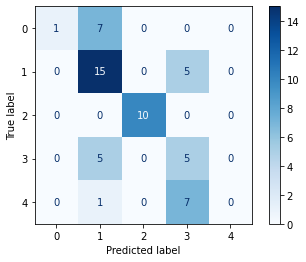

In [72]:
plot_confusion_matrix(best_clf, X_test, y_test, cmap=plt.cm.Blues)

In [73]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.54      0.75      0.63        20
           2       1.00      1.00      1.00        10
           3       0.29      0.50      0.37        10
           4       0.00      0.00      0.00         8

    accuracy                           0.55        56
   macro avg       0.57      0.47      0.44        56
weighted avg       0.57      0.55      0.50        56



/Users/evgeniahohlova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
best_clf.score(X_test,y_test)

0.5535714285714286